In [53]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [54]:
data = pd.read_csv('Final_Nifty50 forecasted data.csv')

In [55]:
data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Predicted
0,2011-03-30,5755.80,5803.15,5753.90,5787.65,133208726,6161.99,5768.0060
1,2011-03-31,5803.05,5872.00,5778.65,5833.75,219441114,11741.25,5801.6113
2,2011-04-01,5835.00,5860.20,5810.40,5826.05,118321855,5698.58,5868.0166
3,2011-04-04,5842.00,5918.70,5833.20,5908.45,106392427,5424.67,5861.4950
4,2011-04-05,5923.85,5928.65,5855.85,5910.05,110625437,5386.96,5915.4190


In [56]:
data.describe()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Predicted
count,2397.000000,2397.000000,2397.000000,2397.000000,2.397000e+03,2397.000000,2397.000000
mean,8356.228223,8398.247872,8299.642032,8349.050167,2.615498e+08,11654.976846,8444.184845
std,2272.209722,2277.151778,2259.700710,2268.241426,1.958539e+08,8426.331019,2312.638577
min,4623.150000,4623.150000,4531.150000,4544.200000,6.555703e+06,297.890000,4636.203600
25%,6018.850000,6050.500000,5979.800000,6009.000000,1.457218e+08,6296.510000,6053.020500
50%,8324.600000,8356.750000,8257.400000,8322.200000,1.882852e+08,8449.270000,8406.979000
75%,10477.550000,10533.550000,10417.800000,10463.200000,2.903960e+08,14006.480000,10619.871000
max,13130.000000,13145.850000,12983.550000,13113.750000,1.811564e+09,78522.930000,13247.267000


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2397 entries, 0 to 2396
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               2397 non-null   object 
 1   Open               2397 non-null   float64
 2   High               2397 non-null   float64
 3   Low                2397 non-null   float64
 4   Close              2397 non-null   float64
 5   Shares Traded      2397 non-null   int64  
 6   Turnover (Rs. Cr)  2397 non-null   float64
 7   Predicted          2397 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 149.9+ KB


In [58]:
df = data[['Date', 'Predicted']]

In [59]:
# Converting Date column to date type
df['Date'] = pd.to_datetime(df['Date'])

In [60]:
y = df.set_index('Date')
y = y.resample('MS').mean()

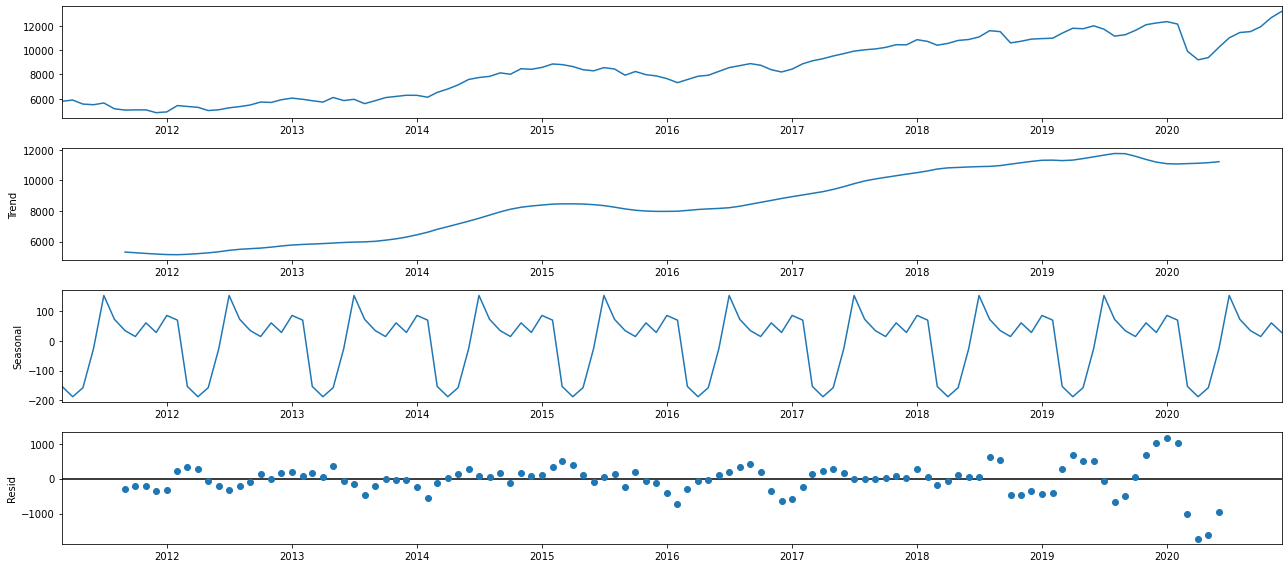

In [61]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

### How many times did Nifty hit at least 2% (give a drop down) higher than the Friday close?

In [62]:
df['Day'] = df['Date'].dt.day_name()
df = df[['Date', 'Day', 'Predicted']]
sub_df = df[df['Day']=='Friday']

In [63]:
# Calculating % change
diff_list = []
def drop_per(df):
    for i in range(len(df['Predicted'])):
         diff_list.append(((df.iloc[i,2] - df.iloc[i-1,2]) / df.iloc[i-1,2])*100)

drop_per(sub_df)
sub_df['Diff'] = diff_list

In [64]:
sub_df.head()

,Date,Day,Predicted,Diff
2,2011-04-01,Friday,5868.0166,-54.965776
7,2011-04-08,Friday,5908.6543,0.692529
10,2011-04-15,Friday,5918.1626,0.160922
19,2011-04-29,Friday,5859.4146,-0.992673
24,2011-05-06,Friday,5564.7495,-5.028917


In [65]:
above_par = len(sub_df[sub_df['Diff']>=2])

In [66]:
below_par = len(sub_df[sub_df['Diff']<2])

In [67]:
print('{} times nifty hit atleast 2% and {} times nifty hit atmost 2%.'.format(above_par, below_par))

90 times nifty hit atleast 2% and 383 times nifty hit atmost 2%.


### What are the changes that nifty would fall if it has reached all time high?

In [68]:
# Counting all time high
all_time_high = df.iloc[0,2]
total_count = 0
indexes = []
for i in range(len(df['Predicted'])):
    if df['Predicted'][i] > all_time_high:
        total_count += 1
        all_time_high = df['Predicted'][i]
        indexes.append(i)
    else:
        pass

In [69]:
# Counting high when it actually fall
falls_count = 0
for i in indexes[:len(indexes)-1]:
    if df['Predicted'][i+1] < df['Predicted'][i]:
        falls_count += 1
    else:
        None

In [70]:
print('% Chances that Nifty would fall if it has reached all time high is : {}'.format(round(falls_count/total_count, 2)))

% Chances that Nifty would fall if it has reached all time high is : 0.46


### Histogram of upward and downwards trends 

In [71]:
# Calculating the upward and downward
up = []
down = []
up_count, down_count = 1, 1
for i in range(len(df.Predicted)-1):
    if df['Predicted'][i+1] > df['Predicted'][i]:
        up_count += 1
    else:
        up.append(up_count)
        up_count = 1
        
for i in range(len(df.Predicted)-1):
    if df['Predicted'][i+1] < df['Predicted'][i]:
        down_count += 1
    else:
        down.append(down_count)
        down_count = 1

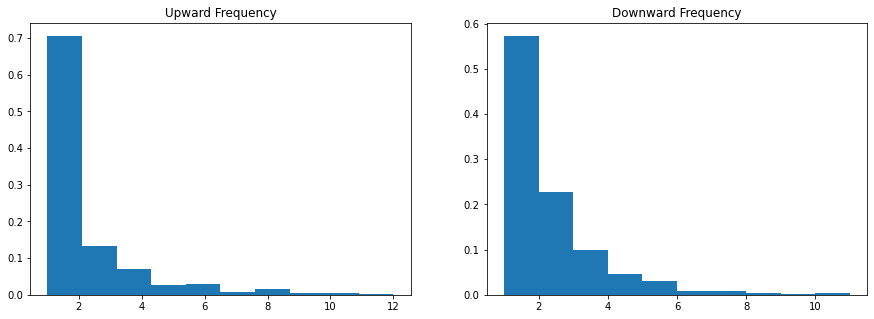

In [87]:
# Viz of upward and downward trend
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('Upward Frequency')
weights_up = np.ones_like(up)/float(len(up))
plt.hist(up, weights=weights_up)


plt.subplot(1, 2, 2)
plt.title('Downward Frequency')
weights_down = np.ones_like(down)/float(len(down))
plt.hist(down, weights=weights_down)
plt.show()

### Slope of last 5, 10 and 15 days

In [73]:
sub_df1 = data[['Date', 'High', 'Predicted']]

In [74]:
# Get the actual future value for a actual value
actual_value = []
actual_future_value = []
for i in range(data.shape[0]-7):
    actual_value.append(sub_df1.iloc[i,2])
    actual_future_value.append(sub_df1.iloc[i+7,2])

In [75]:
# Creating a dataframe
data1 = pd.DataFrame(actual_value, actual_future_value)
data1.reset_index(inplace=True)
data1.rename(columns={'index':'actual_value', 0:'actual_future_value'}, inplace=True)
data1['Date'] = sub_df1.iloc[:-7,0]
data1 = data1[['Date', 'actual_value', 'actual_future_value']]
data1['diff'] = data1['actual_future_value'] - data1['actual_value']
data1.set_index('Date', inplace=True)

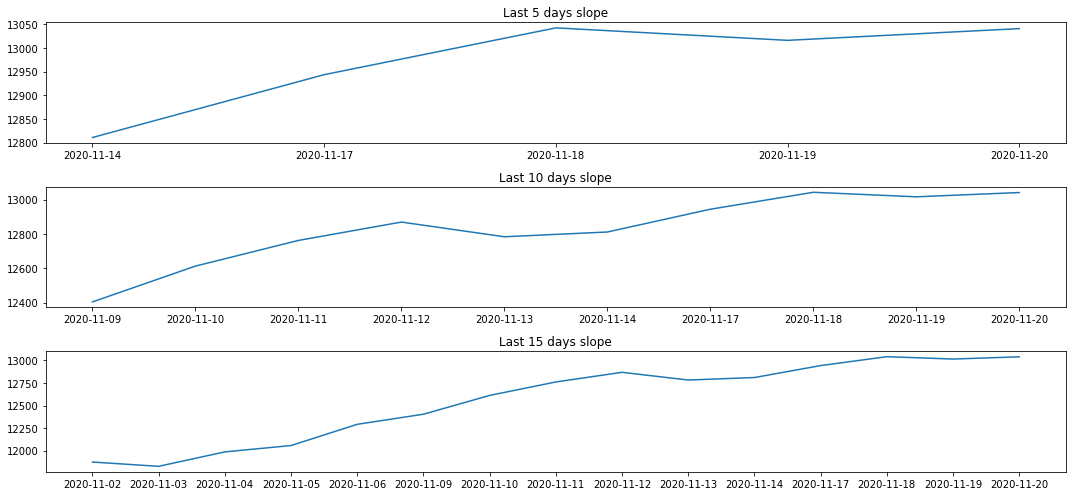

In [76]:
# Plot of slope of last 5, 10 and 15 days
plt.figure(figsize=(15, 7))
plt.subplot(3, 1, 1)
plt.title('Last 5 days slope')
plt.plot(data1['actual_future_value'][-5:])

plt.subplot(3, 1, 2)
plt.title('Last 10 days slope')
plt.plot(data1['actual_future_value'][-10:])

plt.subplot(3, 1, 3)
plt.title('Last 15 days slope')
plt.plot(data1['actual_future_value'][-15:])
plt.tight_layout()
plt.show()

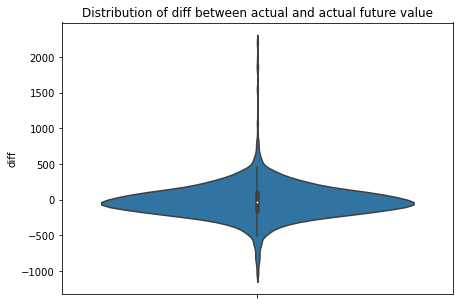

In [77]:
# Violinplot of diff in actual and future actual value
plt.figure(figsize=(7,5))
plt.title('Distribution of diff between actual and actual future value')
sns.violinplot(y = data1['diff'])
plt.show()

### What is more easy to predict, striking a higher percent in next two weeks vs striking a lower percent in the coming week.

In [78]:
ts = df[['Date', 'Predicted']]
ts.set_index('Date', inplace=True)

In [79]:
# Resampling data on week level using mean
weekly_ts = ts.resample('W').mean()

In [80]:
# Calculating the % diff for week
pct = []
for i in range(len(weekly_ts)-1):
     pct.append(((weekly_ts.iloc[i+1,0] - weekly_ts.iloc[i,0]) /  weekly_ts.iloc[i,0]) * 100)

In [81]:
diff_df = pd.DataFrame(weekly_ts.index[:-1], pct)
diff_df.reset_index(inplace=True)

In [82]:
diff_df['week'] = diff_df['Date'].dt.week
diff_df.set_index('week', inplace=True)
diff_df.drop('Date', axis=1, inplace=True)
diff_df.rename(columns={'index':'diff'}, inplace=True)

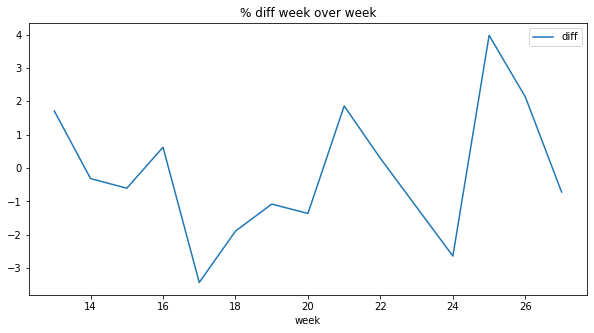

In [83]:
diff_df[:15].plot(figsize=(10,5), title='% diff week over week')